# Decision trees learning

In [1]:
! pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 31.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt

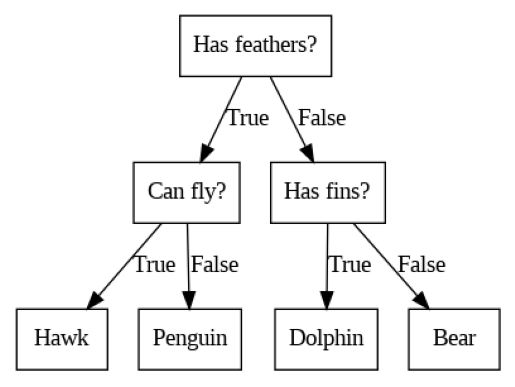

In [3]:
mglearn.plots.plot_animal_tree()

# Building Decision trees

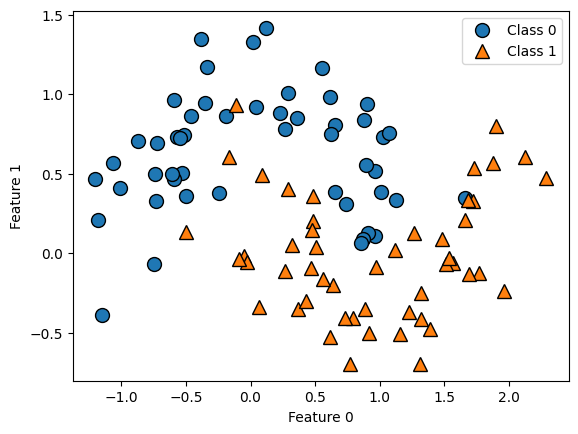

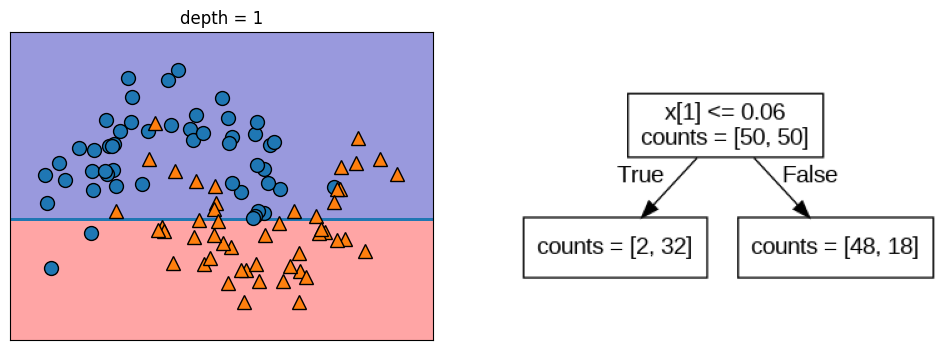

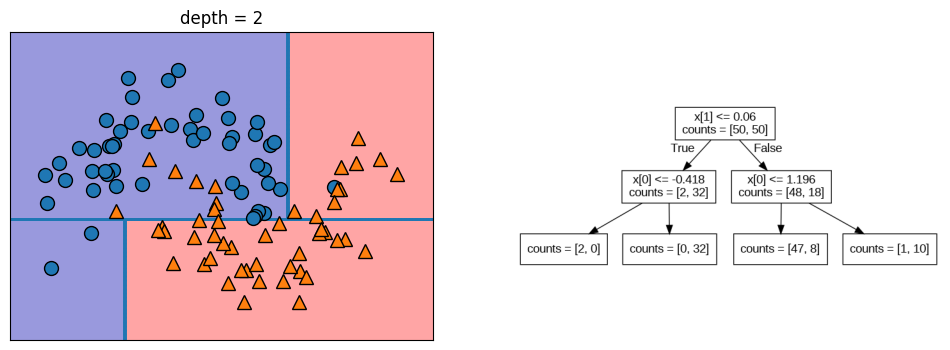

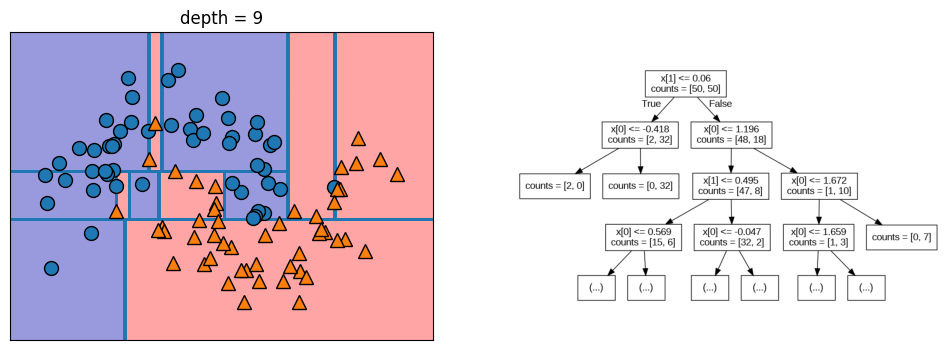

In [5]:
mglearn.plots.plot_tree_progressive()

# Controlling complexity of decision trees

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set is : {tree.score(X_train, y_train):.2f}")
print(f"Accuracy on test set is : {tree.score(X_test, y_test):.2f}")


Accuracy on training set is : 1.00
Accuracy on test set is : 0.94


In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state = 0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set is : {tree.score(X_train, y_train):.2f}")
print(f"Accuracy on test set is : {tree.score(X_test, y_test):.2f}")

Accuracy on training set is : 0.99
Accuracy on test set is : 0.95


# Analyzing decision trees

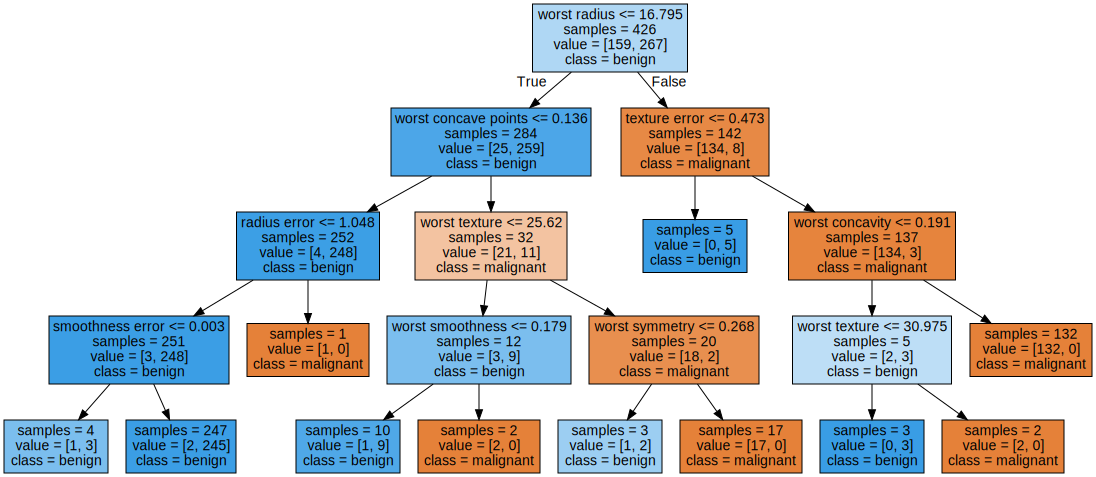

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = "tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)


# Feature of importance in trees

In [9]:
print("feature of importance\n{}".format(tree.feature_importances_))

feature of importance
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


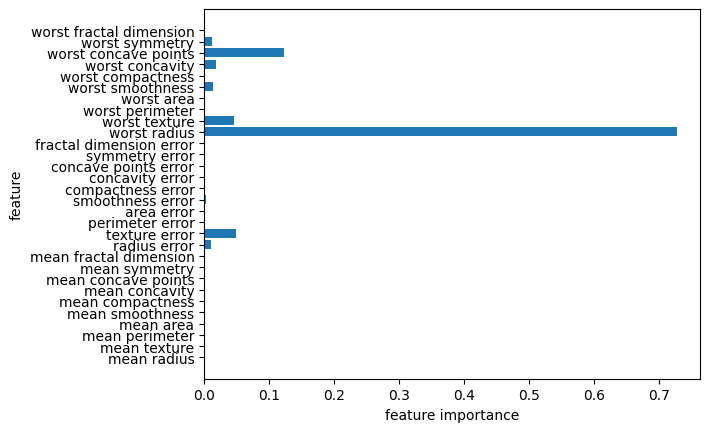

In [11]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("feature importance")
  plt.ylabel('feature')

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


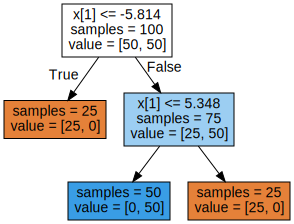

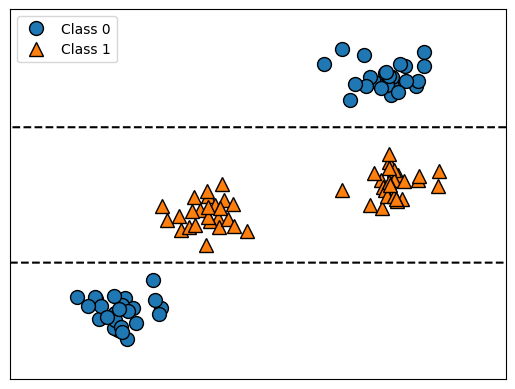

In [12]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'price')

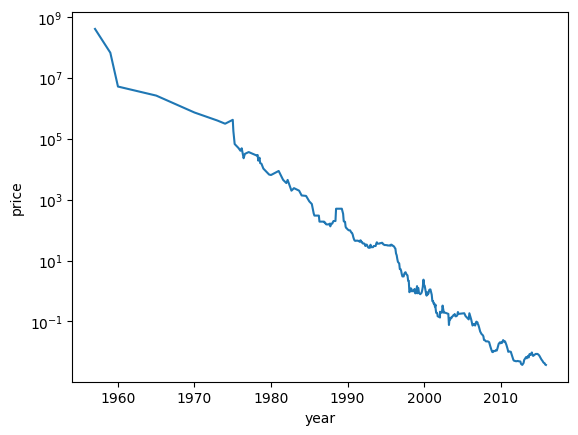

In [13]:
import pandas as pd
ram_prices = pd.read_csv("ram-dataset.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price")

# analyzing random forest

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

x_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=2)

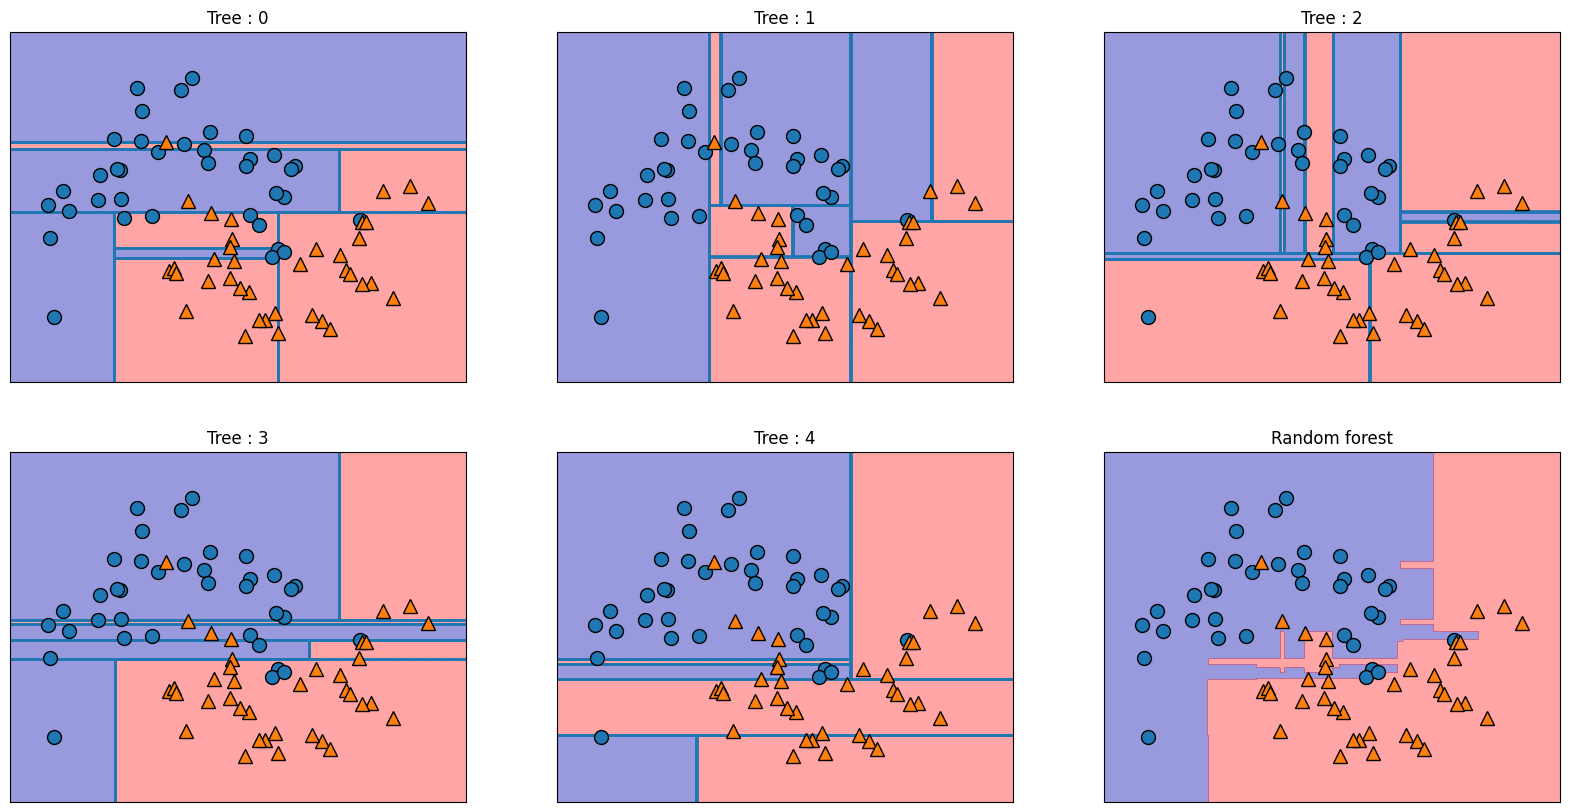

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree : {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax =axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0
)
forest = RandomForestClassifier(n_estimators=100, random_state = 0)
forest.fit(X_train, y_train)

print(f"accuracy on training set : {forest.score(X_train, y_train):.3f}")
print(f"accuracy on test set : {forest.score(X_test, y_test):.3f}")


accuracy on training set : 1.000
accuracy on test set : 0.972


# Entropy

In [34]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
df['target'] = iris.target

print(df.head())


   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]


In [35]:
from collections import Counter
import math

def calculate_entropy(data):
  total_elements = len(data)
  class_counts = Counter(data)
  entropy = 0.0
  for count in class_counts.values():
    probability = count / total_elements
    entropy -= probability * math.log2(probability)
  return entropy
target_entropy = calculate_entropy(df['target'])
print(f"entropy dari target kelas : {target_entropy:.2f}")



entropy dari target kelas : 1.58


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns = ['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


1.0


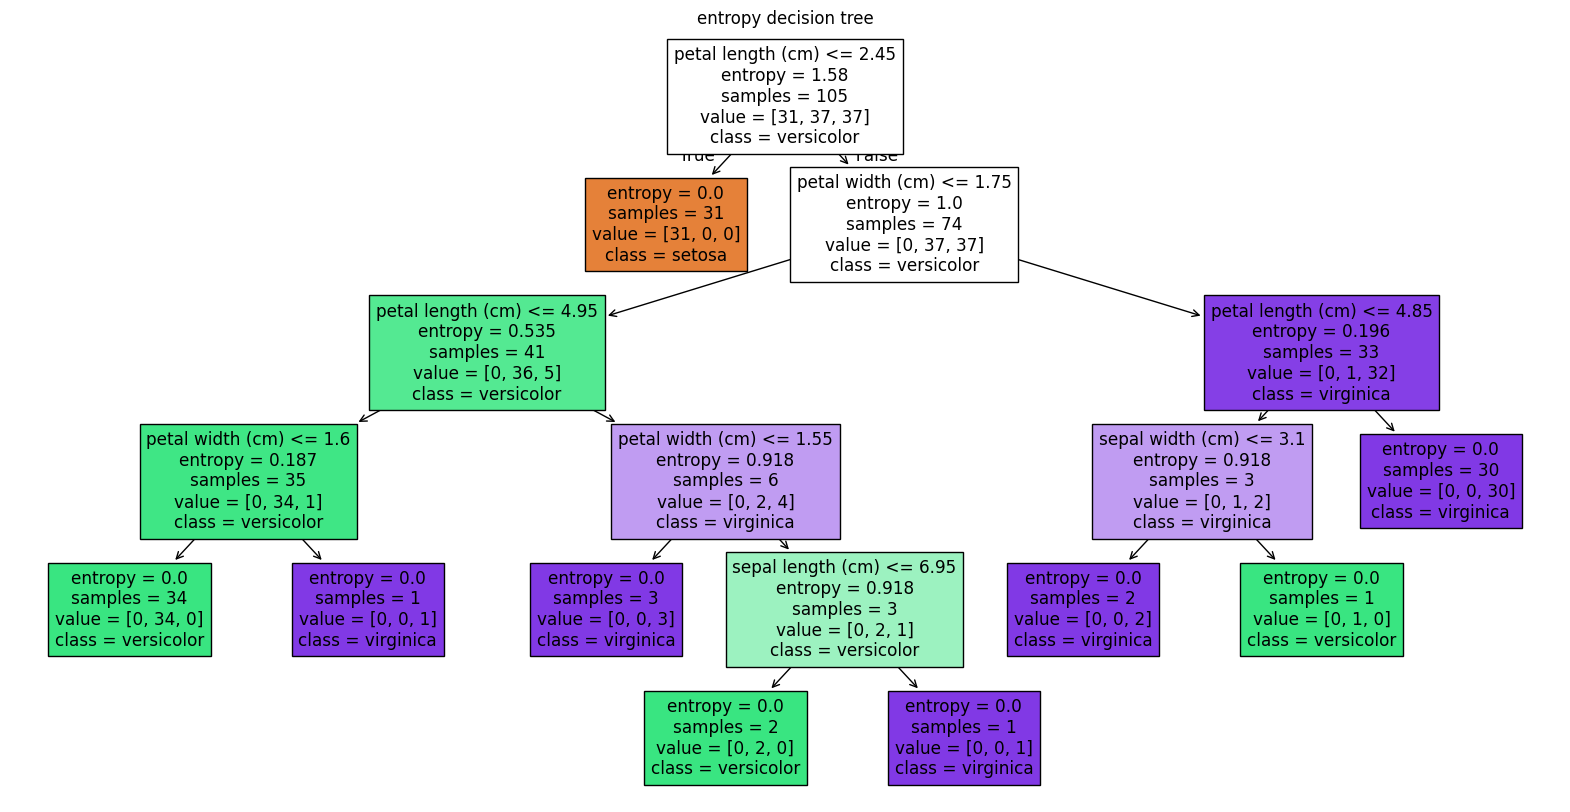

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names= iris.feature_names, class_names=iris.target_names, filled = True)
plt.title('entropy decision tree')
plt.show()

# Classification with ID3

Accuracy of ID3 Decision Tree: 0.9777777777777777


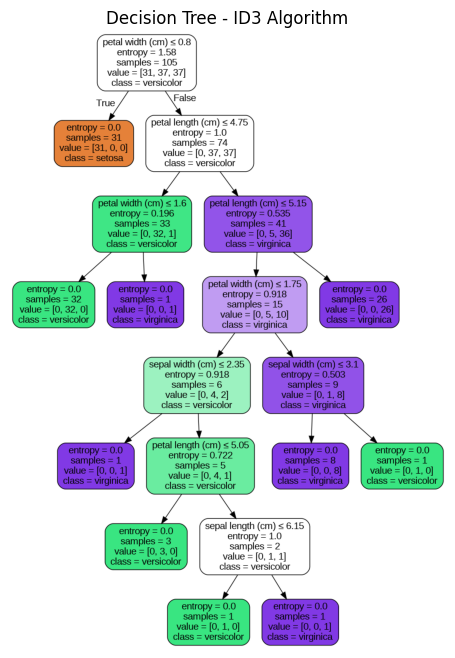

In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt


iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of ID3 Decision Tree: {accuracy}')


dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True,
    special_characters=True
)


graph = graphviz.Source(dot_data)
graph.render("iris_id3_decision_tree", format='png')


tree_image = plt.imread("iris_id3_decision_tree.png")
plt.figure(figsize=(10, 8))
plt.imshow(tree_image)
plt.axis('off')
plt.title('Decision Tree - ID3 Algorithm')
plt.show()


# Classification with C4.5

Accuracy of C4.5 Decision Tree: 1.0


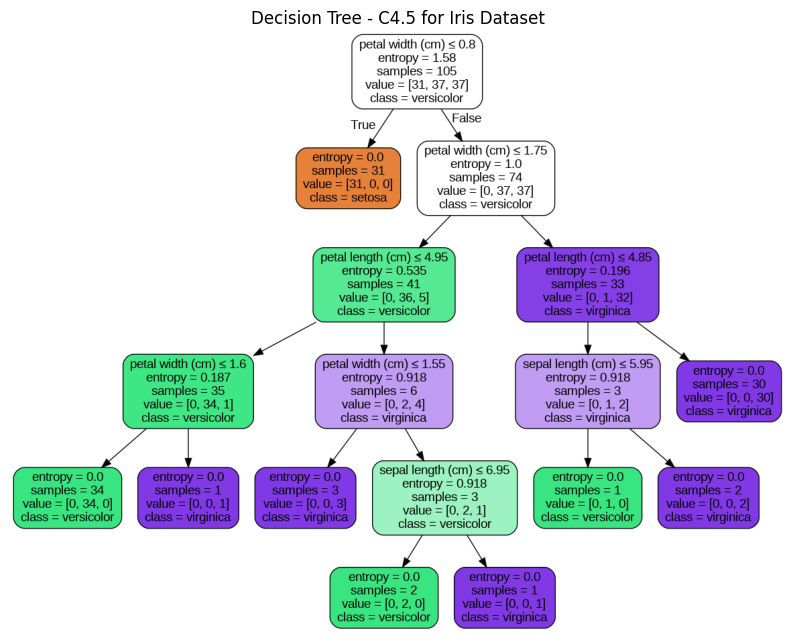

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt


iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of C4.5 Decision Tree: {accuracy}')


dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format='png')


graph_image = plt.imread("iris_decision_tree.png")
plt.figure(figsize=(10, 8))
plt.imshow(graph_image)
plt.axis('off')
plt.title('Decision Tree - C4.5 for Iris Dataset')
plt.show()
